#    Forcasting Model Based Methods Airlines dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
airlines = pd.read_excel("Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [18]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [19]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


##    Preprocessing

###    Extracting Year and Month

In [21]:
airlines["year"] = airlines.Month.dt.strftime("%Y")
airlines["month"] = airlines.Month.dt.strftime("%b")
airlines.head()

,Month,Passengers,year,month
0,1995-01-01,112,1995,Jan
1,1995-02-01,118,1995,Feb
2,1995-03-01,132,1995,Mar
3,1995-04-01,129,1995,Apr
4,1995-05-01,121,1995,May


###  Creating Dummy variables for month 

In [24]:
dummy = pd.get_dummies(airlines.month)
airlines = pd.concat([airlines,dummy],axis=1)
airlines.head()

,Month,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


###    Creating t , t square values and logarithm of Passengers value 

In [54]:
airlines['t'] = np.arange(1,97)
airlines['t_square'] = airlines['t']*airlines['t']
airlines['log_Passengers'] = np.log(airlines.Passengers)
airlines.tail()

,Month,Passengers,year,month,Apr,Aug,Dec,Feb,Jan,Jul,...,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
91,2002-08-01,405,2002,Aug,0,1,0,0,0,0,...,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002,Sep,0,0,0,0,0,0,...,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002,Oct,0,0,0,0,0,0,...,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002,Nov,0,0,0,0,0,0,...,0,0,0,0,1,0,0,95,9025,5.602119
95,2002-12-01,306,2002,Dec,0,0,1,0,0,0,...,0,0,0,0,0,0,0,96,9216,5.723585


##    Visualizing the dataset

###    1) Line Plot

<AxesSubplot:xlabel='year', ylabel='Passengers'>

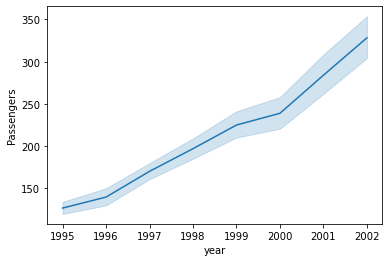

In [28]:
sns.lineplot(x='year',y='Passengers',data=airlines)

<AxesSubplot:>

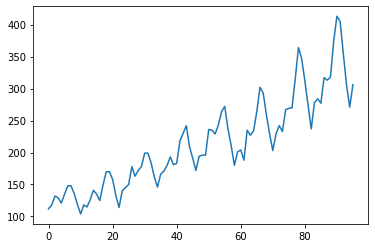

In [30]:
airlines['Passengers'].plot()

###      2)  Histogram

<AxesSubplot:>

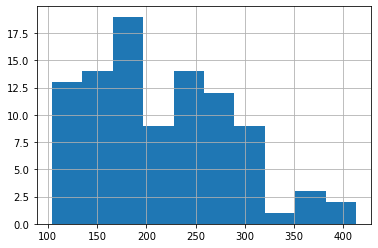

In [32]:
airlines['Passengers'].hist()

###     3)   Density Plot

<AxesSubplot:ylabel='Density'>

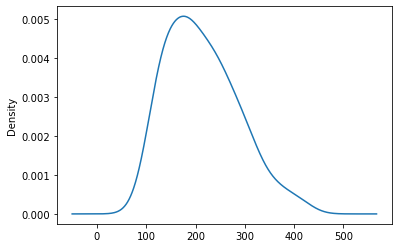

In [33]:
airlines['Passengers'].plot(kind='kde')

###    4) Box Plot

<AxesSubplot:xlabel='year', ylabel='Passengers'>

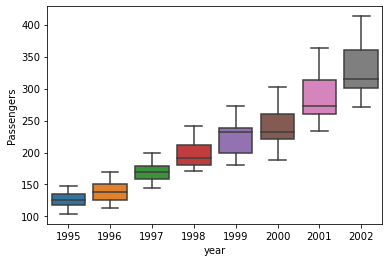

In [34]:
sns.boxplot(x='year',y='Passengers',data=airlines)

###     5)  Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

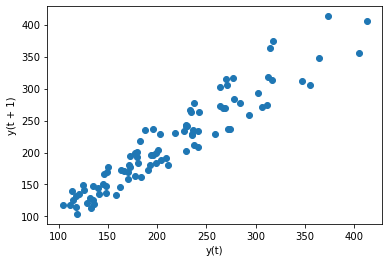

In [35]:
lag_plot(airlines.Passengers)

###      6) ACF Plot

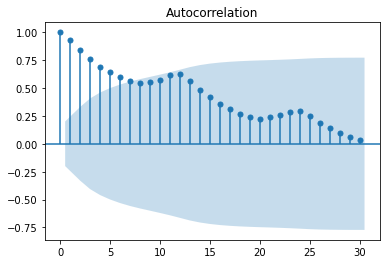

In [38]:
plot_acf(airlines.Passengers, lags=30)
pyplot.show()

###      7) PACF Plot

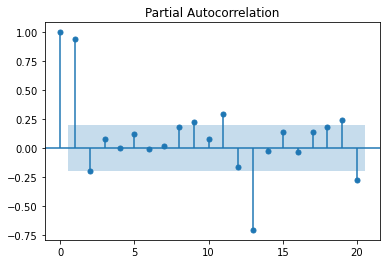

In [40]:
plot_pacf(airlines.Passengers)
pyplot.show()

###     8)  Heat Map

<AxesSubplot:xlabel='month', ylabel='year'>

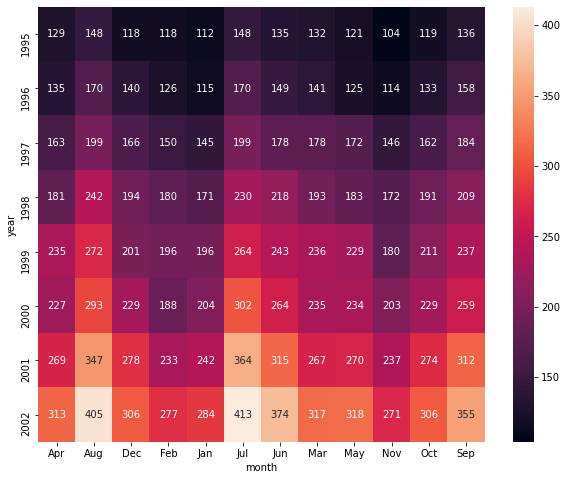

In [41]:
plt.figure(figsize=(10,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

###    9)  Time Series Decomposition Plot

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-46-776c5b7c0bfd>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=15)


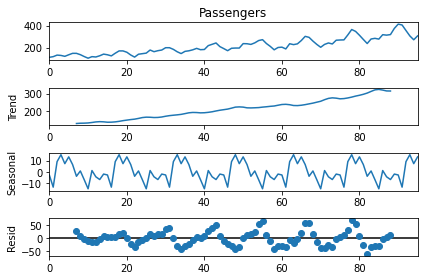

In [46]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=15)
decompose_ts_add.plot()
plt.show() 

###   From the plot we can infer that, it is quadratic in nature and has additive seasonality 

###   Splitting tain and test dataset 

In [56]:
train = airlines.head(60)
test = airlines.tail(36)

##   Forecasting Model Based Method

###   1) Linear Model

In [51]:
import statsmodels.formula.api as smf 

In [53]:
linear_model = smf.ols('Passengers ~ t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

44.35662671788456

###    2) Exponential Model

In [58]:
exponential_model = smf.ols('log_Passengers ~ t',data=train).fit()
pred_exponential = pd.Series(exponential_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exponential)))**2))
rmse_exponential 

42.9119964769827

###    3) Quadratic Model

In [61]:
quadratic_model = smf.ols('Passengers ~ t + t_square',data=train).fit()
pred_quadratic = pd.Series(quadratic_model.predict(test[["t","t_square"]]))
rmse_quadratic = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quadratic))**2))
rmse_quadratic 

40.31203210939921

###    4) Additive Seasonality

In [62]:
additive_season = smf.ols('Passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep +Oct + Nov + Dec',data=train).fit()
pred_add_season = pd.Series(additive_season.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])) 
rmse_add_season = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_season))**2))
rmse_add_season 

119.97073717276969

###    5) Additive Seasonality Quadratic

In [63]:
additive_quadratic = smf.ols('Passengers ~ t + t_square + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep +Oct + Nov + Dec',data=train).fit()
pred_add_quadratic = pd.Series(additive_quadratic.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_quadratic = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_quadratic))**2))
rmse_add_quadratic 

25.492693692032987

###    6) Multiplicative Seasonality

In [64]:
multiple_season = smf.ols('log_Passengers ~ t + t_square + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep +Oct + Nov + Dec',data = train).fit()
pred_multiple_season = pd.Series(multiple_season.predict(test))
rmse_multiple_season = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_multiple_season)))**2))
rmse_multiple_season 

29.467425622197837

###   7) Multiplicative Additive Seasonality

In [65]:
multiple_additive = smf.ols('log_Passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep +Oct + Nov + Dec',data = train).fit()
pred_multiple_additive = pd.Series(multiple_additive.predict(test))
rmse_multiple_additive = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_multiple_additive)))**2))
rmse_multiple_additive 

26.100380469558818

###     Compare the Results

In [67]:
table = {"MODEL":pd.Series(["rmse_linear","rmse_exponential","rmse_quadratic","rmse_add_season","rmse_add_quadratic","rmse_multiple_season","rmse_multiple_additive"]),
         "RMSE_Values":pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_add_season,rmse_add_quadratic,rmse_multiple_season,rmse_multiple_additive])}
table_rmse=pd.DataFrame(table)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
4,rmse_add_quadratic,25.492694
6,rmse_multiple_additive,26.100380
5,rmse_multiple_season,29.467426
2,rmse_quadratic,40.312032
1,rmse_exponential,42.911996
0,rmse_linear,44.356627
3,rmse_add_season,119.970737


###   Additive Quadratic Seasonality Model gives the best prediction of least RMSE of 25.4926